In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1.5)        # 解决Seaborn中文显示问题
warnings.filterwarnings("ignore")

## 数据读取

In [2]:
# 2014年4-9月数据集
df_apr = pd.read_csv('Uber_Data/uber-raw-data-apr14.csv')
df_may = pd.read_csv('Uber_Data/uber-raw-data-may14.csv')
df_jun = pd.read_csv('Uber_Data/uber-raw-data-jun14.csv')
df_jul = pd.read_csv('Uber_Data/uber-raw-data-jul14.csv')
df_aug = pd.read_csv('Uber_Data/uber-raw-data-aug14.csv')
df_sep = pd.read_csv('Uber_Data/uber-raw-data-sep14.csv')
data_initial_14 = pd.concat([df_apr, df_may, df_jun, df_jul, df_aug, df_sep], axis=0, ignore_index=True)

# 观察数据
data_initial_14.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## 数据清洗

In [3]:
# 查看数据格式
data_initial_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


### 缺失值处理

In [4]:
data_initial_14.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

未发现缺失值

### 重复值处理

In [5]:
data_initial_14[data_initial_14.duplicated()]

,Date/Time,Lat,Lon,Base
44,4/1/2014 5:44:00,40.7430,-74.0301,B02512
128,4/1/2014 7:25:00,40.7805,-73.9481,B02512
185,4/1/2014 8:25:00,40.7620,-73.9787,B02512
190,4/1/2014 8:29:00,40.6904,-74.1778,B02512
238,4/1/2014 9:49:00,40.7195,-74.0367,B02512
...,...,...,...,...
4534184,9/30/2014 22:25:00,40.6484,-73.7829,B02764
4534220,9/30/2014 22:32:00,40.7489,-73.9759,B02764
4534256,9/30/2014 22:39:00,40.7714,-73.9502,B02764
4534286,9/30/2014 22:46:00,40.7277,-73.9893,B02764


In [6]:
data_etl_4_9_14 = data_initial_14.drop_duplicates()

### 日期/时间列处理

In [8]:
data_etl_4_9_14['Date/Time'] = pd.to_datetime(data_etl_4_9_14['Date/Time'])

In [9]:
data_etl_4_9_14['Date'] = data_etl_4_9_14['Date/Time'].dt.date
data_etl_4_9_14['Month'] = data_etl_4_9_14['Date/Time'].dt.month
data_etl_4_9_14['WeekDay'] = data_etl_4_9_14['Date/Time'].dt.weekday + 1
data_etl_4_9_14['Hour'] = data_etl_4_9_14['Date/Time'].dt.hour
data_etl_4_9_14.head()

,Date/Time,Lat,Lon,Base,Month,WeekDay,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,2,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,2,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,2,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,2,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,2,0


In [10]:
data_etl_4_9_14.head()

,Date/Time,Lat,Lon,Base,Month,WeekDay,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,2,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,2,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,2,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,2,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,2,0


### 基公司代码匹配

In [14]:
dic_base = {
    'B02512': 'Unter',
    'B02598': 'Hinter',
    'B02617': 'Weiter',
    'B02682': 'Schmecken',
    'B02764': 'Danach-NY',
    'B02765': 'Grun',
    'B02835': 'Dreist',
    'B02836': 'Drinnen'
}
data_etl_4_9_14['BaseName'] = data_etl_4_9_14['Base'].map(dic_base)

## 运营分析

### 4-9月业务增长情况

In [11]:
data_month_c = data_etl_4_9_14.groupby('Month', as_index = False)['Date/Time'].count()
data_month_c.columns = ['Month','count']
data_month_c['last_count'] = 0

for i in range(len(data_month_c)):
    if i == 0:
        data_month_c['last_count'][i] = 0
    else:
        data_month_c['last_count'][i] = data_month_c['count'][i-1]
        
data_month_c['环比增长率'] = (data_month_c['count'] - data_month_c['last_count'])/data_month_c['last_count']
data_month_c

,Month,count,last_count,环比增长率
0,4,556767,0,inf
1,5,642360,556767,0.153732
2,6,653158,642360,0.016810
3,7,781969,653158,0.197213
4,8,813393,781969,0.040186
5,9,1004099,813393,0.234457


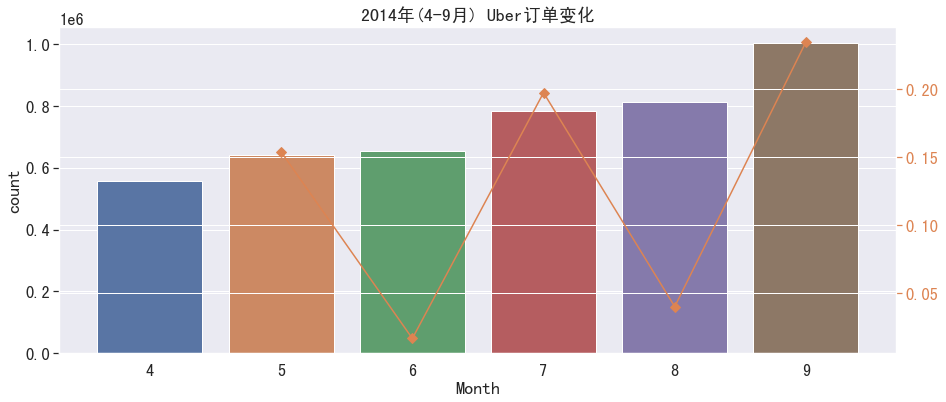

In [12]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x="Month", y="count", data=data_month_c)

ax2 = ax.twinx()
ax2.plot(data_month_c.index, data_month_c["环比增长率"], color="C1", marker="D", ms=7)
ax2.tick_params(axis="y", colors="C1")
ax.set_title('2014年(4-9月) Uber订单变化')

plt.show()

从上图可知, 在2014年4-9月, Uber出行业务量数月增长, 7月、9月的环比增长最大，9月业务环比增长23.44%

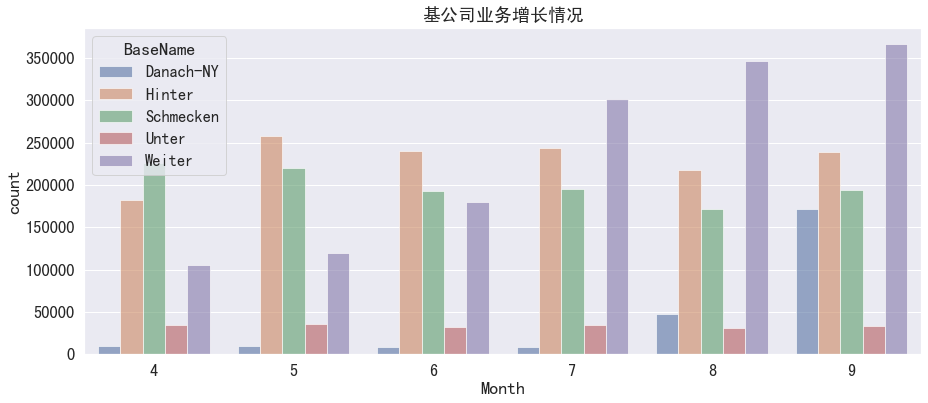

In [16]:
data_base_c = data_etl_4_9_14.groupby(['Month','BaseName'], as_index = False)['Date/Time'].count()
data_base_c.columns = ['Month','BaseName','count']

plt.figure(figsize=(15,6))
ax = sns.barplot(
    data=data_base_c,
    x="Month", y="count", hue="BaseName",
    ci="sd",  alpha=.6
)
ax.set_title('基公司业务增长情况')

plt.show()

观察上图, 可以看出2014年4-9月份, Uber旗下5个基公司的业务增长情况
- Hinter和Unter业务量比较稳定, 波动不大; 
- Weiter数月持续增长, 在7月份开始反超其他基公司; 
- Danach-NY也有增长趋势, 在8-9月增长幅度较大; 
- 而Schmecken数月呈有业务下滑的趋势

In [15]:
data_etl_4_9_14['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

### TLC基公司订单总量比较

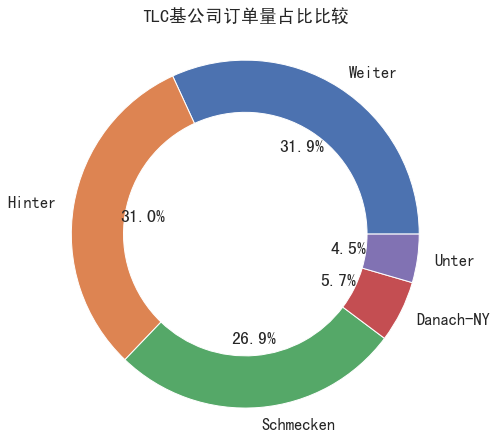

In [17]:
base_freq = data_etl_4_9_14['BaseName'].value_counts()
plt.pie(base_freq.values, labels=base_freq.index,
        radius=2,
        autopct='%.1f%%',
        wedgeprops=dict(width=0.6))
plt.title('TLC基公司订单量占比比较', y=1.45)
plt.show()

### 出行区域分布

In [18]:
# 输出csv文件, Tableau进行地图可视化
data_etl_4_9_14.to_csv('data_etl_4_9_14.csv')

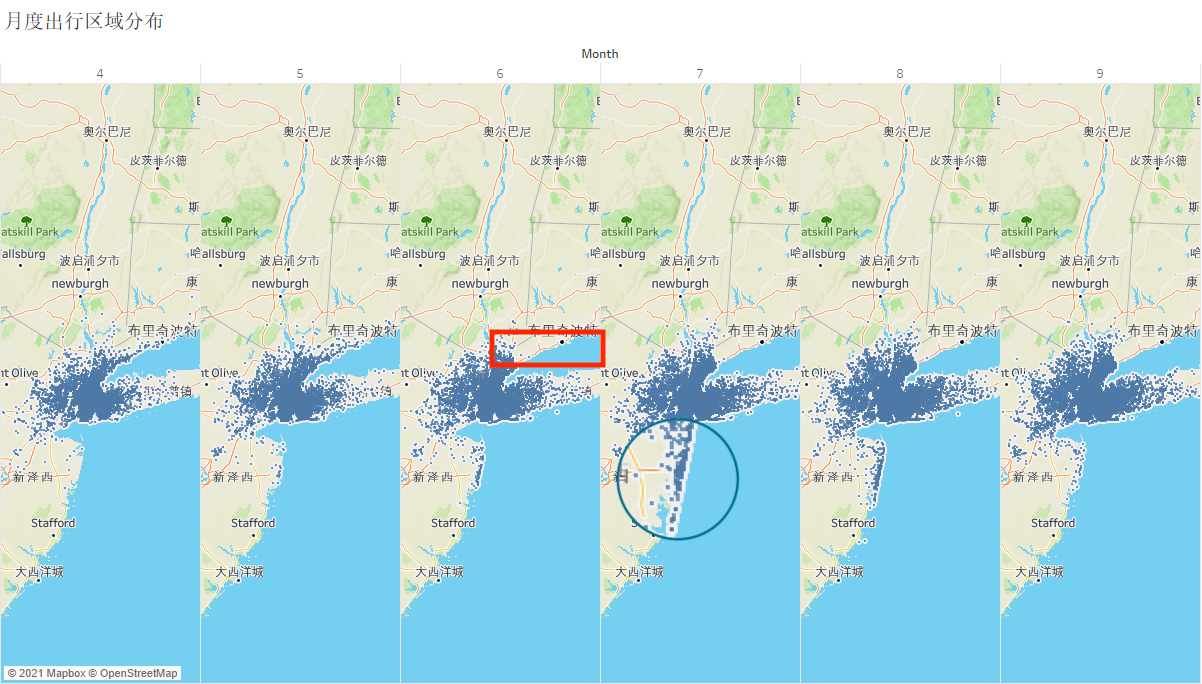

#### 月度出行区域分布
- 红色矩形标识区域: 从6月(至9月)没有无出行记录, 该区域为布里奇波特沿海低区一带(图示), 猜测可能是Uber业务在地域上进行策略调整, 需一步分析佐证
- 圆圈标识区域: 在7~8月出行记录明显激增, 结合季节性和区域(新泽西沿海一带)判断, 推测旅游区淡旺季交替, 推动了业务增长
- 整体区域: 见分布密集不断向外, 说明4~9月, Uber的业务一直在区域性范围扩张

## 用户出行特征分析

### 出行订单月份分布

In [22]:
dic_month = {
    1:'一月',
    2:'二月',
    3:'三月',
    4:'四月',
    5:'五月',
    6:'六月',
    7:'七月',
    8:'八月',
    9:'九月',
    10:'十月',
    11:'十一月',
    12:'十二月'
}
data_etl_4_9_14['月份'] = data_etl_4_9_14['Date/Time'].dt.month.map(dic_month)

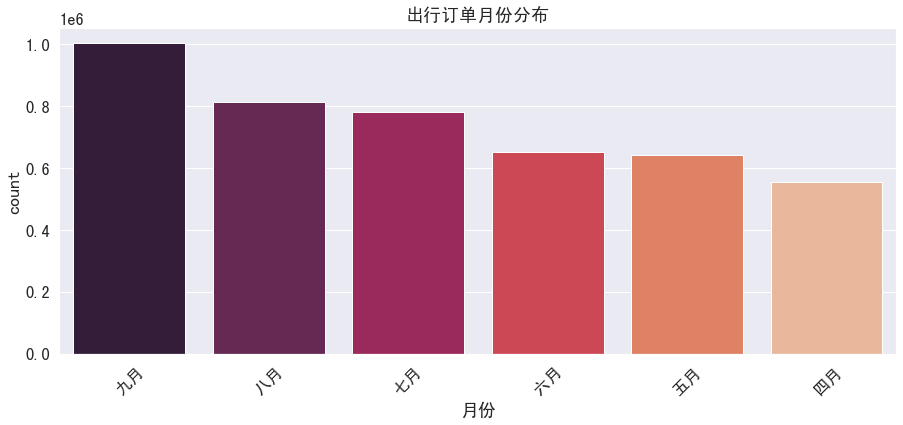

In [25]:
data_month_cnt = data_etl_4_9_14.groupby('月份', as_index=False)['Date/Time'].count()
data_month_cnt.columns = ['月份','count']
data_month_cnt = data_month_cnt.sort_values('count', ascending=False)
data_month_cnt.reset_index(inplace=True)


plt.figure(figsize=(15,6))

ax = sns.barplot(x="月份", y="count", data=data_month_cnt, palette='rocket')


ax.set_title('出行订单月份分布')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

月度出行需要考虑淡旺季交替, 节假日等季节性对业务的影响

### 出行订单星期分布

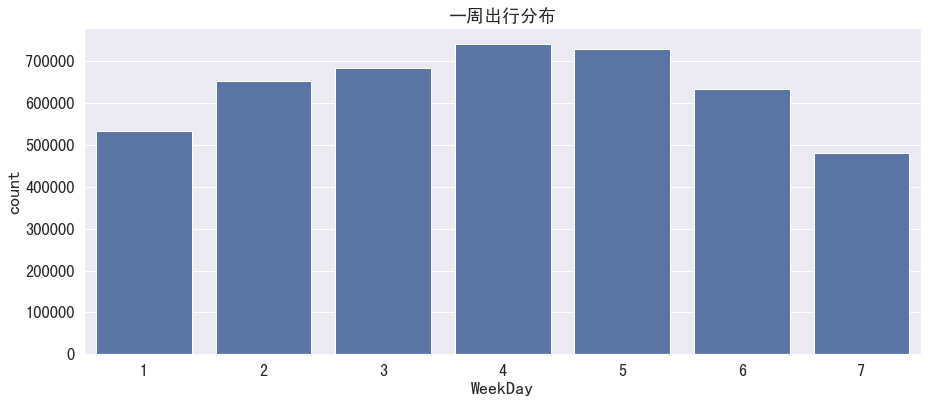

In [28]:
data_weekday_cnt = data_etl_4_9_14.groupby('WeekDay', as_index=False)['Date/Time'].count()
data_weekday_cnt.columns = ['WeekDay','count']
#data_weekday_cnt = data_weekday_cnt.sort_values('count', ascending=False)
#data_weekday_cnt.reset_index(inplace=True)


plt.figure(figsize=(15,6))

ax = sns.barplot(x="WeekDay", y="count", data=data_weekday_cnt, color='b')


ax.set_title('一周出行分布')
plt.show()

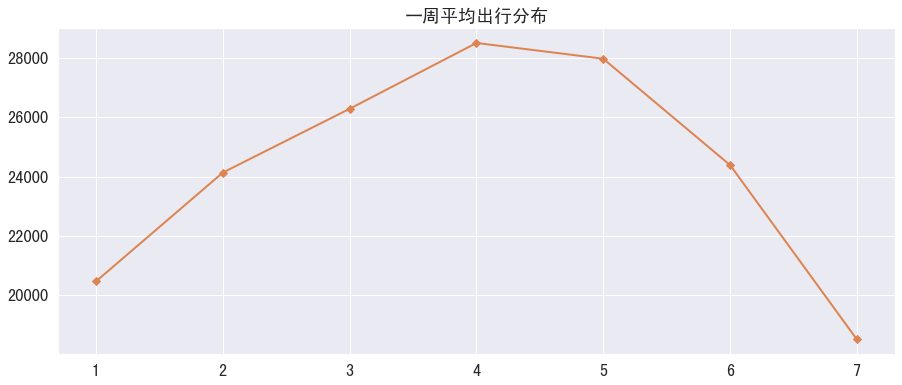

In [72]:
# 按日期, weekday进行分组
data_weekday_avg = data_etl_4_9_14.groupby(
    ['Date', 'WeekDay'], as_index=False)['Date/Time'].count()
data_weekday_avg.columns = ['Date', 'WeekDay', 'count']

# 计算每天的平均出行记录
data_weekday_avg = data_weekday_avg.groupby('WeekDay').agg('mean')

# 绘制
plt.figure(figsize=(15, 6))

plt.plot(data_weekday_avg,
         c='C1',
         marker='D',
         linewidth=2)
plt.title('一周平均出行分布')
plt.show()

出行高峰出现在周四和周五, 周一和周日出行次数较少, 可能由于在周末, 很多地方是休息的

### 出行订单小时分布

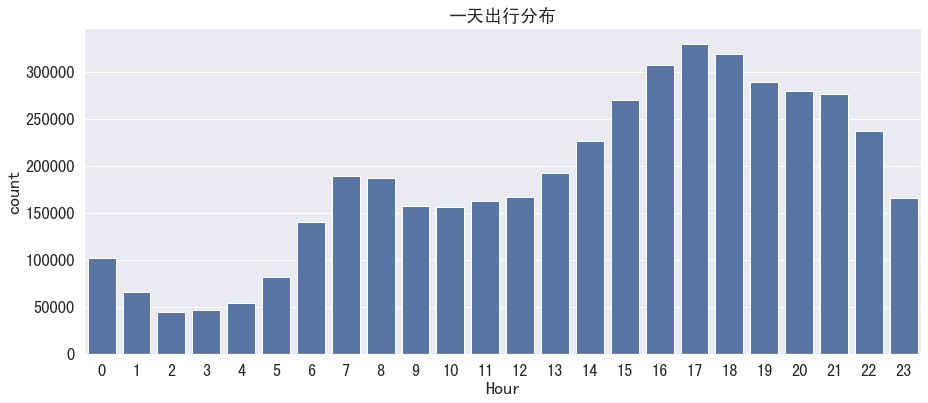

In [73]:
data_hour_cnt = data_etl_4_9_14.groupby('Hour', as_index=False)['Date/Time'].count()
data_hour_cnt.columns = ['Hour','count']
#data_hour_cnt = data_hour_cnt.sort_values('count', ascending=False)
#data_hour_cnt.reset_index(inplace=True)


plt.figure(figsize=(15,6))

ax = sns.barplot(x="Hour", y="count", data=data_hour_cnt, color='b')


ax.set_title('一天出行分布')
plt.show()

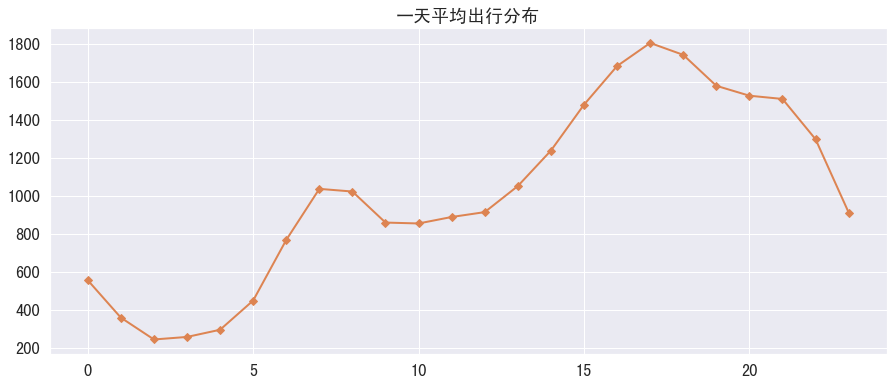

In [74]:
# 按日期, weekday进行分组
data_hour_avg = data_etl_4_9_14.groupby(['Date', 'Hour'], as_index=False)['Date/Time'].count()
data_hour_avg.columns = ['Date', 'Hour', 'count']

# 计算每天的平均出行记录
data_hour_avg = data_hour_avg.groupby('Hour').agg('mean')

# 绘制
plt.figure(figsize=(15, 6))

plt.plot(data_hour_avg,
         c='C1',
         marker='D',
         linewidth=2)
plt.title('一天平均出行分布')
plt.show()

图中两个山峰, 分别是早上7点和下午5点, 主要通勤时间. 而早上10点之后, 出行数量上升, 猜测是大多数地方可能10点以后才营业

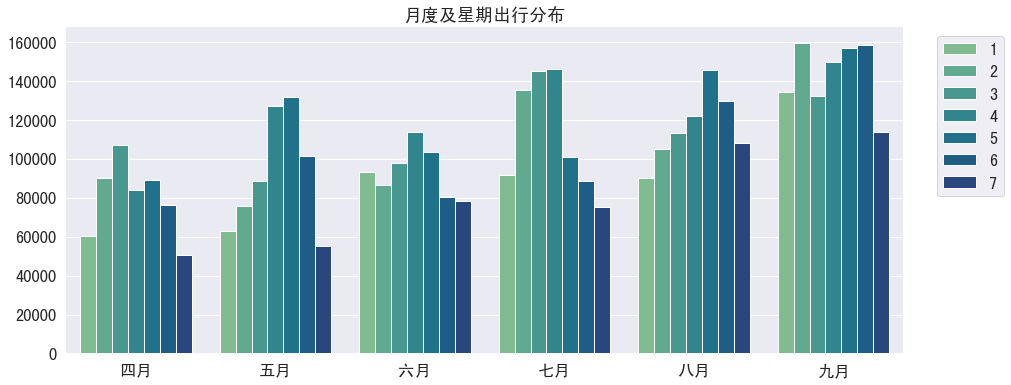

In [86]:
plt.figure(figsize=(15, 6))


sns.countplot(x='月份',
              data=data_etl_4_9_14, 
              palette='crest',
              saturation=1,
              hue='WeekDay')
              #hue_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])


sns.despine(bottom=True, left=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('月度及星期出行分布')
plt.legend(bbox_to_anchor= (1.03, 1) );

出行数量随时间而增加, 9月份整体需求增加

### 用户出行区域分布

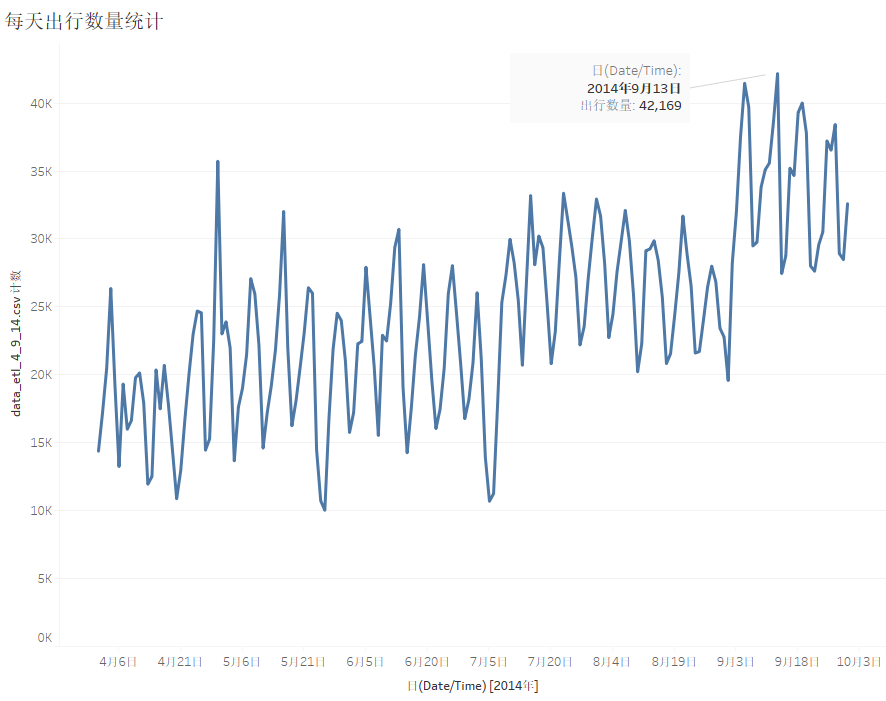

#### 选择9月13日的记录为参考
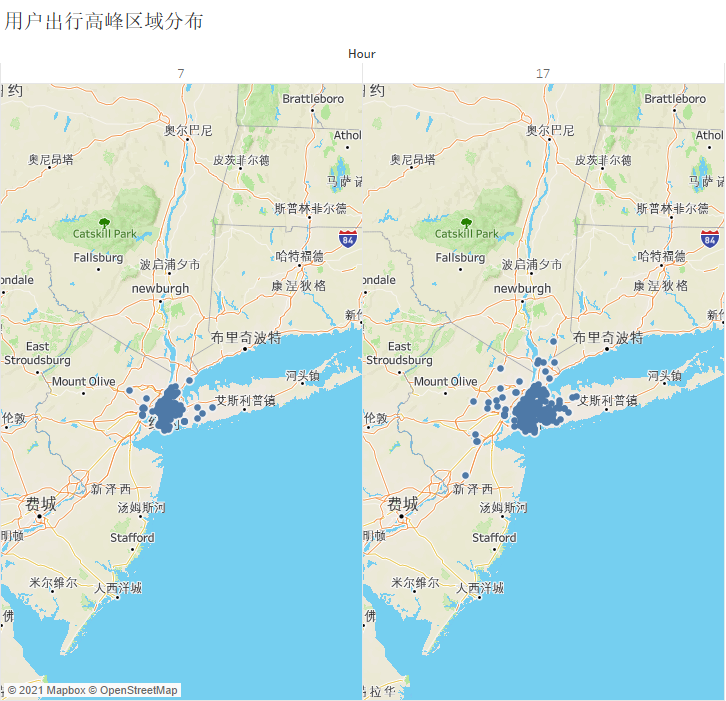

7点、17点出行区域分布比较集中，可以根据区域经纬度提前调度车辆

## 总结
- 运营情况：2014年，Uber业务一直处于数月增长状态，出行覆盖区域不断扩张。应该同时对不同的基公司采取不同的运营策略，Danach-NY和Unter考虑是否存在内部运营问题
- 季节性业务：根据时间、区域维度，针对淡旺季交替、节假日出行进行精细化运营，优化出行车辆分布
- 用户出行特征：集中在通勤时间（7点、17点），以及周四和周五，提前指导车辆调度至集中区域，提高车辆利用率；其他时间可以优化业务策略，如发放优惠券、动态价格策略等，让车辆提高活跃度